Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests
import csv
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import math
!pip install folium==0.5.0
import folium

## Data preparation

In [3]:
t_headers = ['State','Capital','Population']
t_rows = [['Andhra Pradesh','Hyderabad',7674689],['Arunachal Pradesh','Itanagar',59490],['Assam','Dispur',957000],['Bihar','Patna',1684297],['Chhattisgarh','Raipur',1027264],['Goa','Panaji',70991],['Gujarat','Gandhinagar',206167],['Haryana','Chandigarh',961587],['Himachal Pradesh','Shimla',169578],['Jharkhand','Ranchi',1073427],['Karnataka','Bengaluru',8520435],['Kerala','Thiruvananthapuram',1679754],['Madhya Pradesh','Bhopal',1886100],['Maharashtra','Mumbai',18394912],['Manipur','Imphal',418739],['Meghalaya','Shillong',354759],['Mizoram','Aizawl',293416],['Nagaland','Kohima',99039],['Odisha','Bhubaneswar',886397],['Punjab','Chandigarh',961587],['Rajasthan','Jaipur',3046163],['Sikkim','Gangtok',100286],['Tamil Nadu','Chennai',8653521],['Telangana','Hyderabad',7674689],['Tripura','Agartala',400004],['Uttar Pradesh','Lucknow',2902920],['Uttarakhand','Dehradun',706124],['West Bengal','Kolkata',14035959],['Andaman and Nicobar Islands','Port Blair',108058],['Chandigarh','Chandigarh',961587],['Dadra & Nagar Haveli and Daman & Diu','Daman',44282],['Delhi','New Delhi',16349831],['Jammu and Kashmir','Srinagar ',1264202],['Jammu and Kashmir','Jammu ',657314],['Lakshadweep','Kavaratti',11210],['Puducherry','Pondicherry',244377],['Ladakh','Leh',30870]]

In [4]:
df = pd.DataFrame(t_rows, columns = t_headers) 
df.head()

,State,Capital,Population
0,Andhra Pradesh,Hyderabad,7674689
1,Arunachal Pradesh,Itanagar,59490
2,Assam,Dispur,957000
3,Bihar,Patna,1684297
4,Chhattisgarh,Raipur,1027264


In [5]:
geolocator = Nominatim(user_agent="Location_latitude")
location_details=[]
for x in df['Capital']:
    location_intermediate=[]
    location=geolocator.geocode(x)
    x,lat,long=x,location.latitude, location.longitude
    location_intermediate=[x,lat,long]
    location_details.append(location_intermediate)


In [6]:
tposition_headers = ['Capital','Latitude','Longitude']
df_location_details = pd.DataFrame(location_details, columns = tposition_headers) 
df_location_details.head()

,Capital,Latitude,Longitude
0,Hyderabad,17.388786,78.461065
1,Itanagar,27.097966,93.623729
2,Dispur,26.151308,91.793380
3,Patna,25.609324,85.123525
4,Raipur,21.237947,81.633683


In [7]:
Result_df=pd.merge(df, df_location_details, how="inner", on=["Capital"])
Result_df.head()

,State,Capital,Population,Latitude,Longitude
0,Andhra Pradesh,Hyderabad,7674689,17.388786,78.461065
1,Andhra Pradesh,Hyderabad,7674689,17.388786,78.461065
2,Telangana,Hyderabad,7674689,17.388786,78.461065
3,Telangana,Hyderabad,7674689,17.388786,78.461065
4,Arunachal Pradesh,Itanagar,59490,27.097966,93.623729


In [8]:
Result_df.drop_duplicates(subset=['State', 'Capital'], keep='last',inplace=True)
Result_df.head()

,State,Capital,Population,Latitude,Longitude
1,Andhra Pradesh,Hyderabad,7674689,17.388786,78.461065
3,Telangana,Hyderabad,7674689,17.388786,78.461065
4,Arunachal Pradesh,Itanagar,59490,27.097966,93.623729
5,Assam,Dispur,957000,26.151308,91.793380
6,Bihar,Patna,1684297,25.609324,85.123525


## Data Exploration

In [9]:
#to check if all NaN values are removed from dataset

is_NaN = Result_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = Result_df[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [State, Capital, Population, Latitude, Longitude]
Index: []


<BarContainer object of 37 artists>

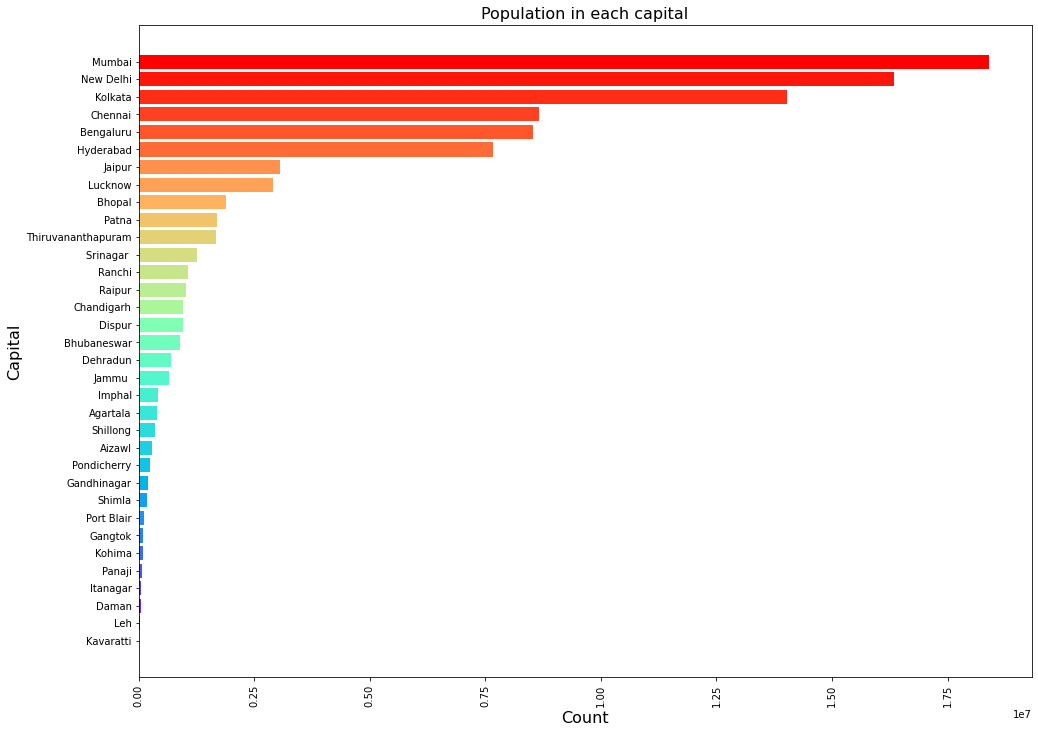

In [10]:
import matplotlib.cm as cm
Result_df.sort_values('Population',inplace=True)
population = Result_df['Population']
capital = Result_df['Capital']


colors = cm.rainbow(np.linspace(0, 1, len(population.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("Capital", fontsize = 16)
plt.title("Population in each capital", fontsize = 16)
plt.barh(capital, population.values, color = colors)

In [11]:
print('The data has {} capitals'.format(len(Result_df['Capital'].unique())))

The data has 34 capitals


In [12]:
print('The states are - ' + str(list(Result_df['State'].unique())))

The states are - ['Lakshadweep', 'Ladakh', 'Dadra & Nagar Haveli and Daman & Diu', 'Arunachal Pradesh', 'Goa', 'Nagaland', 'Sikkim', 'Andaman and Nicobar Islands', 'Himachal Pradesh', 'Gujarat', 'Puducherry', 'Mizoram', 'Meghalaya', 'Tripura', 'Manipur', 'Jammu and Kashmir', 'Uttarakhand', 'Odisha', 'Assam', 'Chandigarh', 'Punjab', 'Haryana', 'Chhattisgarh', 'Jharkhand', 'Kerala', 'Bihar', 'Madhya Pradesh', 'Uttar Pradesh', 'Rajasthan', 'Telangana', 'Andhra Pradesh', 'Karnataka', 'Tamil Nadu', 'West Bengal', 'Delhi', 'Maharashtra']


In [13]:
# create map of India  and capitals of each state
map_newyork = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# add markers to map
for lat, lng, state, capital  in zip(Result_df['Latitude'], Result_df['Longitude'], Result_df['State'], Result_df['Capital']):
    label = '{}, {}'.format(state,capital)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [15]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()


In [16]:
#Lets check number of main categories and sub-categories present in Foursquare API

categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    #print(venues)
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']
        #print('\t\t' + sub_venues)

In [17]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


## Get Required Categories

In [18]:
tourist_category = []
business_category = []
education_category=[]
req_categories = ['Arts & Entertainment', 'Nightlife Spot', 'Outdoors & Recreation']
req_categories2 = ['Food', 'Shop & Service', 'Travel & Transport']
req_categories3=['College & University']


for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in req_categories2:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)
        


In [19]:
#remove unwanted categories from tourist list
tourist_category.remove('Lounge')
tourist_category.remove('Movie Theater')
tourist_category.remove('Bar')

#remove unwanted categories from business list
business_category.remove('Bus Station')
business_category.remove('ATM')
business_category.remove('Train Station')
business_category.remove('Bus Stop')
business_category.remove('Light Rail Station')
business_category.remove('Toll Booth')
business_category.remove('Toll Plaza')
business_category.remove('Tram Station')

In [20]:

def getNearbyVenues_category(names, latitudes, longitudes, radius,category):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Capital', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(category)]
    
    return(nearby_venues)

In [21]:
tourist_venues = getNearbyVenues_category(names=Result_df['Capital'],
                                   latitudes=Result_df['Latitude'],
                                   longitudes=Result_df['Longitude'],
                                          radius=5000,
                                    category=tourist_category   
                                  )
tourist_venues.head()

,Capital,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,Leh,34.164203,77.584813,Leh Palace,34.166287,77.586390,Palace
11,Leh,34.164203,77.584813,Shey Palace,34.159815,77.633323,Palace
13,Daman,20.420005,72.863763,Daman,20.421682,72.839065,Beach
14,Daman,20.420005,72.863763,The Deltin,20.412848,72.856197,Casino
17,Daman,20.420005,72.863763,Jetty,20.412949,72.832805,Arcade


In [22]:
business_venues = getNearbyVenues_category(names=Result_df['Capital'],
                                   latitudes=Result_df['Latitude'],
                                   longitudes=Result_df['Longitude'],
                                           radius=5000,
                                    category=business_category
                                      
                                  )
business_venues.head()

,Capital,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kavaratti,10.559050,72.636569,kavaratti,10.549820,72.626635,Boat or Ferry
1,Leh,34.164203,77.584813,The Grand Dragon,34.156612,77.580351,Hotel
3,Leh,34.164203,77.584813,Rendezvous Cafe,34.165095,77.584020,Bakery
6,Leh,34.164203,77.584813,Coffee Culture,34.165123,77.584145,Coffee Shop
7,Leh,34.164203,77.584813,Pangong Hotel,34.161511,77.582676,Hotel


In [23]:
print('The recors obtained for tourist venue are - ' + str(tourist_venues.shape[0]))
print('The recors obtained for business venue are - ' + str(business_venues.shape[0]))

The recors obtained for tourist venue are - 111
The recors obtained for business venue are - 966


## Tourist Venues retrieved per capital

In [24]:
tourist_venues_capital = tourist_venues.groupby('Capital', as_index=False).count()
tourist_venues_capital = tourist_venues_capital[['Capital','Venue']]
tourist_venues_capital.rename(columns={'Venue':'No of Venues'}, inplace=True)

max_tourist_venue=tourist_venues_capital['No of Venues'].max()

<BarContainer object of 25 artists>

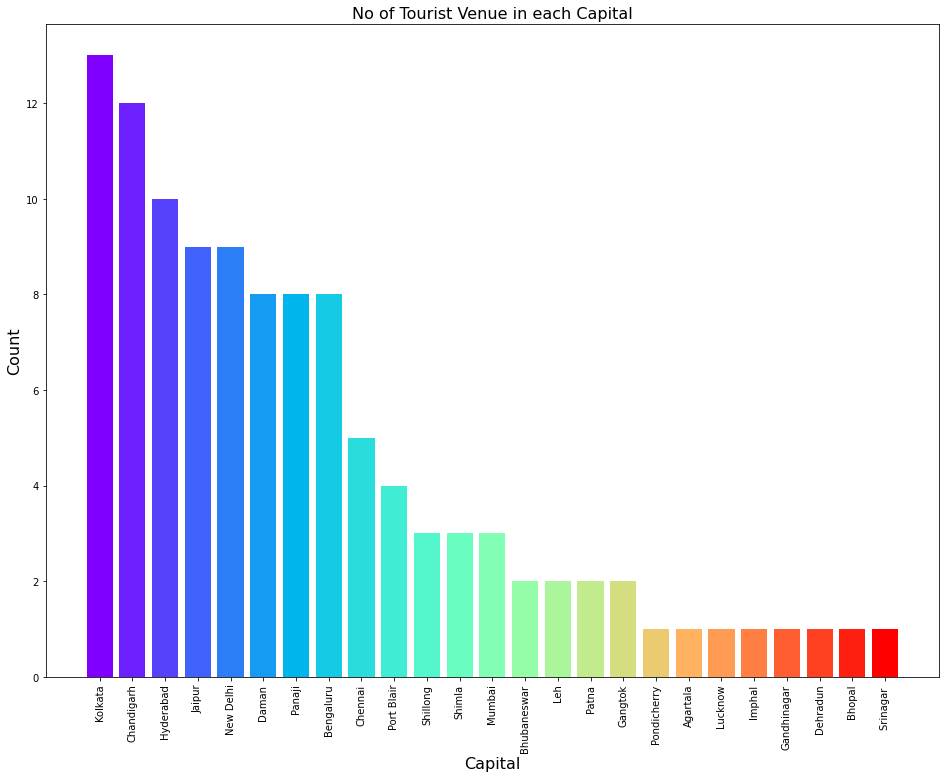

In [25]:
tourist_venues_capital.sort_values('No of Venues', ascending=False, inplace=True)
venues = tourist_venues_capital['No of Venues']
capital = tourist_venues_capital['Capital']


colors = cm.rainbow(np.linspace(0, 1, len(venues.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Capital", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Tourist Venue in each Capital", fontsize = 16)
plt.bar(capital, venues.values, color = colors)

## Business Venues retrieved per capital

In [26]:
business_venues_capital = business_venues.groupby('Capital', as_index=False).count()
business_venues_capital = business_venues_capital[['Capital','Venue']]
business_venues_capital.rename(columns={'Venue':'No of Venues'}, inplace=True)

max_business_venue=business_venues_capital['No of Venues'].max()

<BarContainer object of 32 artists>

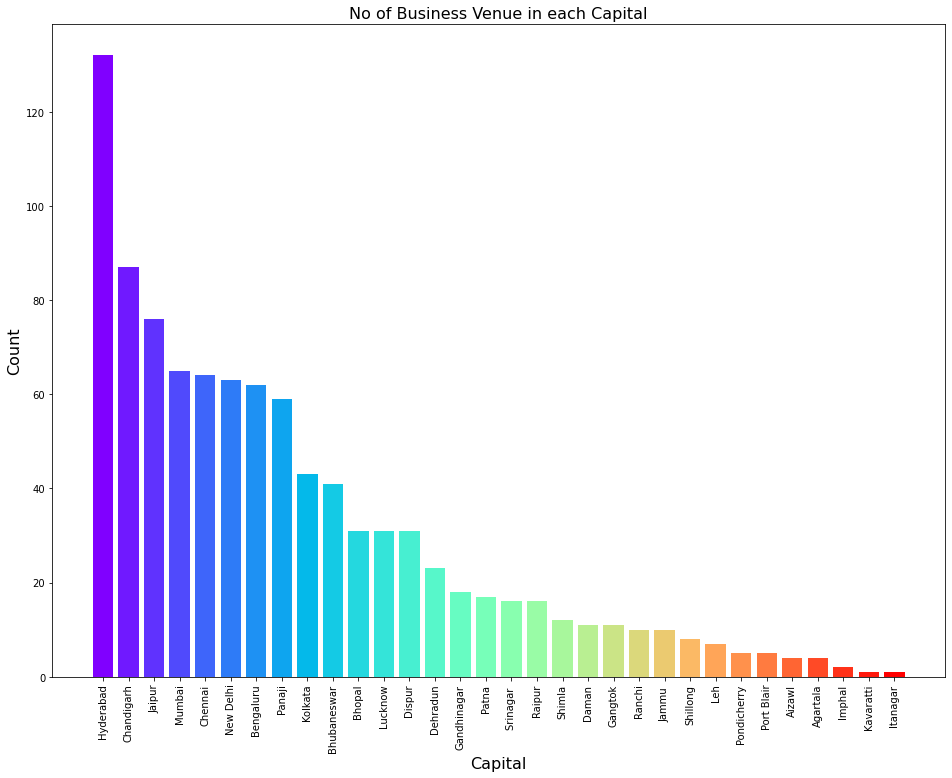

In [27]:
business_venues_capital.sort_values('No of Venues', ascending=False, inplace=True)
venues = business_venues_capital['No of Venues']
capital = business_venues_capital['Capital']


colors = cm.rainbow(np.linspace(0, 1, len(venues.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Capital", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Business Venue in each Capital", fontsize = 16)
plt.bar(capital, venues.values, color = colors)

## Data Analysis


### 1. Tourist Similarities between capitals


In [28]:
tourist_venues.head()

,Capital,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,Leh,34.164203,77.584813,Leh Palace,34.166287,77.586390,Palace
11,Leh,34.164203,77.584813,Shey Palace,34.159815,77.633323,Palace
13,Daman,20.420005,72.863763,Daman,20.421682,72.839065,Beach
14,Daman,20.420005,72.863763,The Deltin,20.412848,72.856197,Casino
17,Daman,20.420005,72.863763,Jetty,20.412949,72.832805,Arcade


<B> Unique categories from returned Venue </B>

In [29]:
tourist_venues['Venue Category'].unique()

array(['Palace', 'Beach', 'Casino', 'Arcade', 'Pool', 'Sculpture Garden',
       'Harbor / Marina', 'Concert Hall', 'Bridge', 'Stadium', 'Plaza',
       'Scenic Lookout', 'Island', 'Museum', 'Historic Site', 'Trail',
       'Nightclub', 'Park', 'Athletics & Sports', 'Nature Preserve',
       'Garden', 'Lake', 'National Park', 'Art Gallery',
       'Performing Arts Venue', 'Brewery', 'Campground', 'Field',
       'Theme Park', 'Music Venue'], dtype=object)

In [30]:
# one hot encoding
tourist_venues_onehot = pd.get_dummies(tourist_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tourist_venues_onehot['Capital'] = tourist_venues['Capital'] 

# move neighborhood column to the first column
fixed_columns = [tourist_venues_onehot.columns[-1]] + list(tourist_venues_onehot.columns[:-1])
tourist_venues_onehot = tourist_venues_onehot[fixed_columns]

tourist_venues_onehot.head()

,Capital,Arcade,Art Gallery,Athletics & Sports,Beach,Brewery,Bridge,Campground,Casino,Concert Hall,...,Palace,Park,Performing Arts Venue,Plaza,Pool,Scenic Lookout,Sculpture Garden,Stadium,Theme Park,Trail
4,Leh,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,Leh,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13,Daman,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Daman,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17,Daman,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
tourist_venues_onehot.shape

(111, 31)

#### Group rows by capital and by taking the mean of the frequency of occurrence of each category

In [32]:
tourist_venues_grouped = tourist_venues_onehot.groupby('Capital').mean().reset_index()
tourist_venues_grouped.head()

,Capital,Arcade,Art Gallery,Athletics & Sports,Beach,Brewery,Bridge,Campground,Casino,Concert Hall,...,Palace,Park,Performing Arts Venue,Plaza,Pool,Scenic Lookout,Sculpture Garden,Stadium,Theme Park,Trail
0,Agartala,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,1.000,0.0,0.000,0.0,0.00,0.00,0.0,0.0,0.0
1,Bengaluru,0.125,0.125,0.0,0.0,0.375,0.0,0.0,0.0,0.0,...,0.0,0.125,0.0,0.125,0.0,0.00,0.00,0.0,0.0,0.0
2,Bhopal,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.00,0.00,0.0,0.0,0.0
3,Bhubaneswar,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,1.000,0.0,0.000,0.0,0.00,0.00,0.0,0.0,0.0
4,Chandigarh,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.250,0.0,0.25,0.25,0.0,0.0,0.0


In [33]:
tourist_venues_grouped.shape

(25, 31)

In [34]:
#function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = max_tourist_venue

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Capital']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

# create a new dataframe
capital_venues_sorted = pd.DataFrame(columns=columns)
capital_venues_sorted['Capital'] = tourist_venues_grouped['Capital']

for ind in np.arange(tourist_venues_grouped.shape[0]):
    capital_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tourist_venues_grouped.iloc[ind, :], num_top_venues)

capital_venues_sorted.head()

,Capital,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category,11th Most Common Venue Category,12th Most Common Venue Category,13th Most Common Venue Category
0,Agartala,Park,Trail,Island,Art Gallery,Athletics & Sports,Beach,Brewery,Bridge,Campground,Casino,Concert Hall,Field,Garden
1,Bengaluru,Brewery,Arcade,Art Gallery,Plaza,Park,Nightclub,Historic Site,Athletics & Sports,Beach,Bridge,Campground,Casino,Concert Hall
2,Bhopal,National Park,Trail,Island,Art Gallery,Athletics & Sports,Beach,Brewery,Bridge,Campground,Casino,Concert Hall,Field,Garden
3,Bhubaneswar,Park,Trail,Island,Art Gallery,Athletics & Sports,Beach,Brewery,Bridge,Campground,Casino,Concert Hall,Field,Garden
4,Chandigarh,Sculpture Garden,Scenic Lookout,Plaza,Garden,Trail,Historic Site,Art Gallery,Athletics & Sports,Beach,Brewery,Bridge,Campground,Casino


In [36]:
venue_venue_category = tourist_venues.groupby(['Capital', 'Venue Category'], as_index=False).agg(lambda x: ", ".join(x))
venue_venue_category.head()

,Capital,Venue Category,Venue
0,Agartala,Park,Heritage Park
1,Bengaluru,Arcade,The Lotus Pavillion
2,Bengaluru,Art Gallery,Chitra Kala Parishad
3,Bengaluru,Brewery,"The Biere Club, Arbor Brewing Company, Communiti"
4,Bengaluru,Nightclub,Pebble


In [37]:
r, c = capital_venues_sorted.shape

for rows in range(r):
    a = capital_venues_sorted.iloc[rows, 0]
    for col, col_name in enumerate(capital_venues_sorted.columns[1:]):
        b = capital_venues_sorted.iloc[rows, col+1]
        pf = venue_venue_category[venue_venue_category['Capital'].str.contains(a) & venue_venue_category['Venue Category'].str.contains(b)]
        if not pf.empty:
            #print(b)
            idx = pf['Venue'].index.values.astype(int)[0]
            ven = pf['Venue'][idx]
            capital_venues_sorted.iloc[rows, capital_venues_sorted.columns.get_loc(col_name)] = ven
        elif pf.empty:
            capital_venues_sorted.iloc[rows, capital_venues_sorted.columns.get_loc(col_name)] = ''

In [38]:
indicators = ['st', 'nd', 'rd']
new = []

for ind in np.arange(max_tourist_venue):
    try:
        new.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        new.append('{}th Most Common Venue'.format(ind+1))

capital_venues_sorted.columns = capital_venues_sorted.columns[:1].tolist() + new

#### Most common venues according to venue category in each capital

In [67]:
capital_venues_sorted.head()

,Cluster Labels,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue
0,2,Agartala,Heritage Park,,,,,,,,,,,,
1,0,Bengaluru,"The Biere Club, Arbor Brewing Company, Communiti",The Lotus Pavillion,Chitra Kala Parishad,M.G Road Boulevard,Cubbon Park,Pebble,,,,,,,
2,0,Bhopal,Van Vihar National Park,,,,,,,,,,,,
3,2,Bhubaneswar,"Ekamra Haat, Biju Pattnaik Park (Forest Park)",,,,,,,,,,,,
4,0,Chandigarh,"Rock Garden, Rock Garden, Rock Garden","Gehri Route, Gehri Route, Gehri Route","Sector 36, Sector 36, Sector 36","Rose Garden, Rose Garden, Rose Garden",,,,,,,,,


## Perform Clustering 

Find the optimal k value for clustering

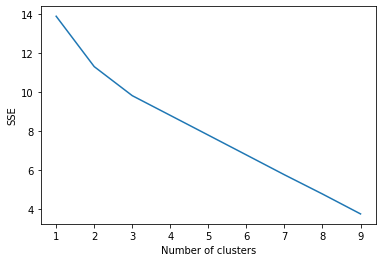

In [40]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(tourist_venues_grouped.drop('Capital',axis=1))
    tourist_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [41]:
# set number of clusters
kclusters = 4

nearby_tourist_grouped_clustering = tourist_venues_grouped.drop('Capital',axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_tourist_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 0, 2, 0, 3, 3, 3, 1, 0], dtype=int32)

In [43]:
# add clustering labels
#capital_venues_sorted.drop('Cluster Labels',axis=1,inplace=True)
capital_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
capital_list=Result_df[['Capital','Latitude','Longitude']]
capital_tourist_merged = capital_venues_sorted.join(capital_list.set_index('Capital'), on='Capital')
capital_tourist_merged.drop_duplicates(subset='Capital', keep='first', inplace=True)
capital_tourist_merged.head()

,Cluster Labels,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,Latitude,Longitude
0,2,Agartala,Heritage Park,,,,,,,,,,,,,23.831238,91.282382
1,0,Bengaluru,"The Biere Club, Arbor Brewing Company, Communiti",The Lotus Pavillion,Chitra Kala Parishad,M.G Road Boulevard,Cubbon Park,Pebble,,,,,,,,12.979120,77.591300
2,0,Bhopal,Van Vihar National Park,,,,,,,,,,,,,23.258486,77.401989
3,2,Bhubaneswar,"Ekamra Haat, Biju Pattnaik Park (Forest Park)",,,,,,,,,,,,,20.266777,85.843559
4,0,Chandigarh,"Rock Garden, Rock Garden, Rock Garden","Gehri Route, Gehri Route, Gehri Route","Sector 36, Sector 36, Sector 36","Rose Garden, Rose Garden, Rose Garden",,,,,,,,,,30.733442,76.779714


In [68]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(capital_tourist_merged['Latitude'], capital_tourist_merged['Longitude'],capital_tourist_merged['Capital'], capital_tourist_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Cluster

In [45]:
capital_tourist_merged.loc[capital_tourist_merged['Cluster Labels'] == 0, capital_tourist_merged.columns[[0] + list(range(1, capital_tourist_merged.shape[1]))]]

,Cluster Labels,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,Latitude,Longitude
1,0,Bengaluru,"The Biere Club, Arbor Brewing Company, Communiti",The Lotus Pavillion,Chitra Kala Parishad,M.G Road Boulevard,Cubbon Park,Pebble,,,,,,,,12.979120,77.591300
2,0,Bhopal,Van Vihar National Park,,,,,,,,,,,,,23.258486,77.401989
4,0,Chandigarh,"Rock Garden, Rock Garden, Rock Garden","Gehri Route, Gehri Route, Gehri Route","Sector 36, Sector 36, Sector 36","Rose Garden, Rose Garden, Rose Garden",,,,,,,,,,30.733442,76.779714
9,0,Gangtok,Tashi View Point,M G Marg,,,,,,,,,,,,27.329046,88.612267
10,0,Hyderabad,"Tank Bund, Tank Bund","Necklace Road, Necklace Road","Kismet, Kismet","Lamakaan, Lamakaan","Chacha Nehru Park, Chacha Nehru Park",,,,,,,,,17.388786,78.461065
12,0,Jaipur,"Jantar Mantar, Hawa Mahal | हवा महल (Hawa Mah...",Jawahar Kala Kendra (JKK),Central Park,100% Rock,Albert Hall Museum,,,,,,,,,26.915458,75.818982
13,0,Kolkata,"Nocturne, Underground, Privy Ultra Lounge, Plu...","Triangular Park, Deshapriya Park, Park Circus ...",Gariahat Junction,Science City,Maidan,Princep Ghat,The GRID,,,,,,,22.541418,88.357691
15,0,Lucknow,Zero Degree Lounge,,,,,,,,,,,,,26.838100,80.934600
16,0,Mumbai,"Gateway Taproom, British Brewing Company",Vikrant Circle,,,,,,,,,,,Vikrant Circle,19.075990,72.877393
17,0,New Delhi,"Lodhi Gardens (लोधी बाग़) (Lodhi Gardens), Neh...",Sriram Centre For Art And Culture | श्रीराम कल...,"The Rooftop Pool, Leela Palace Delhi",Hauz Khas Social,Connaught Place | कनॉट प्लेस (Connaught Place),Triveni Kala Sangam | त्रिवेणी कला संगम,Amar Jawan Jyoti | अमर जवान ज्योति (Amar Jawan...,,,,,,,28.613895,77.209006


In [46]:
capital_tourist_merged.loc[capital_tourist_merged['Cluster Labels'] == 1, capital_tourist_merged.columns[[0] + list(range(1, capital_tourist_merged.shape[1]))]]

,Cluster Labels,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,Latitude,Longitude
8,1,Gandhinagar,Indroda Nature Park,,,,,,,,,,,,,23.223288,72.649227
11,1,Imphal,MARY KOM'S FFC,,,,,,,,,,,,,24.800609,93.937000
14,1,Leh,"Leh Palace, Shey Palace",,,,,,,,,,,,,34.164203,77.584813


In [47]:
capital_tourist_merged.loc[capital_tourist_merged['Cluster Labels'] == 2, capital_tourist_merged.columns[[0] + list(range(1, capital_tourist_merged.shape[1]))]]

,Cluster Labels,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,Latitude,Longitude
0,2,Agartala,Heritage Park,,,,,,,,,,,,,23.831238,91.282382
3,2,Bhubaneswar,"Ekamra Haat, Biju Pattnaik Park (Forest Park)",,,,,,,,,,,,,20.266777,85.843559
19,2,Patna,"Patna Zoo, Gandhi Maidan",,,,,,,,,,,,,25.609324,85.123525
24,2,Srinagar,Dal Lake | डल झील | دل ليك,,,,,,,,,,,,,34.074744,74.820444


In [48]:
capital_tourist_merged.loc[capital_tourist_merged['Cluster Labels'] == 3, capital_tourist_merged.columns[[0] + list(range(1, capital_tourist_merged.shape[1]))]]

,Cluster Labels,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,Latitude,Longitude
5,3,Chennai,"Marina Beach | மெரினா கடற்கரை (Marina Beach), ...",Island Grounds,Fort Museum,,,,,,,,,,,13.083694,80.270186
6,3,Daman,"Jetty, Hotel Sandy Resort","Daman, Devka Beach",Daman-Gujarat Border,Hotel Mirasol Resort & Water Park,The Deltin,Daman Fort,,,,,,,,20.420005,72.863763
7,3,Dehradun,Forest Research Institute,,,,,,,,,,,,,30.325565,78.043681
18,3,Panaji,"Miramar Beach, Coco Beach, Vaiguinim Beach","Deltin Jaqk, Chances",Dr.Shyama Prasad Mukherjee Indoor Stadium,Haunted Pilerne Riverlet,Kala Academy,,,,,,,,,15.498995,73.828214
20,3,Pondicherry,Karaikal Beach,,,,,,,,,,,,,10.915649,79.806949
21,3,Port Blair,"Corbyn's Cove Beach, North Bay Island",Andaman & Nicobar Islands,Samudrika Marine Museum,,,,,,,,,,,11.664535,92.739045


## 2. Business Similarities between Capital

In [49]:
business_venues.head()

,Capital,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kavaratti,10.559050,72.636569,kavaratti,10.549820,72.626635,Boat or Ferry
1,Leh,34.164203,77.584813,The Grand Dragon,34.156612,77.580351,Hotel
3,Leh,34.164203,77.584813,Rendezvous Cafe,34.165095,77.584020,Bakery
6,Leh,34.164203,77.584813,Coffee Culture,34.165123,77.584145,Coffee Shop
7,Leh,34.164203,77.584813,Pangong Hotel,34.161511,77.582676,Hotel


In [50]:
business_venues['Venue Category'].unique()

array(['Boat or Ferry', 'Hotel', 'Bakery', 'Coffee Shop',
       'Indian Restaurant', 'Pizza Place', 'Airport', 'Restaurant',
       'Bank', 'Diner', 'Tourist Information Center', 'Bistro',
       'American Restaurant', 'Portuguese Restaurant', 'Breakfast Spot',
       'Café', 'Clothing Store', 'Asian Restaurant', 'Seafood Restaurant',
       'Steakhouse', 'Dessert Shop', 'Donut Shop', 'Food',
       'Vegetarian / Vegan Restaurant', 'Food Court', 'Convenience Store',
       'Spa', 'BBQ Joint', 'Shopping Mall', 'Fast Food Restaurant',
       'Sandwich Place', 'Dumpling Restaurant', 'Market',
       'Business Service', 'Furniture / Home Store', 'Italian Restaurant',
       'Jewelry Store', 'Gift Shop', 'Flea Market', 'Tea Room',
       'Food & Drink Shop', 'Irish Pub', 'Department Store',
       'Mexican Restaurant', 'Miscellaneous Shop', 'Spanish Restaurant',
       'Salon / Barbershop', 'Rental Car Location',
       'Health & Beauty Service', 'Fried Chicken Joint', 'Juice Bar',
       

In [51]:
# one hot encoding
business_venues_onehot = pd.get_dummies(business_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
business_venues_onehot['Capital'] = business_venues['Capital'] 

# move neighborhood column to the first column
fixed_columns = [business_venues_onehot.columns[-1]] + list(business_venues_onehot.columns[:-1])
business_venues_onehot = business_venues_onehot[fixed_columns]

business_venues_onehot.head()

,Capital,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Snack Place,Spa,Spanish Restaurant,Steakhouse,Tea Room,Tourist Information Center,Toy / Game Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store
0,Kavaratti,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Leh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Leh,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Leh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Leh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Group rows by capital and by taking the mean of the frequency of occurrence of each category of business


In [52]:
business_venues_grouped = business_venues_onehot.groupby('Capital').mean().reset_index()
business_venues_grouped.head()

,Capital,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Snack Place,Spa,Spanish Restaurant,Steakhouse,Tea Room,Tourist Information Center,Toy / Game Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store
0,Agartala,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,Aizawl,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2,Bengaluru,0.016129,0.0,0.00000,0.016129,0.0,0.032258,0.016129,0.0,0.016129,...,0.016129,0.0,0.0,0.032258,0.016129,0.0,0.016129,0.0,0.0,0.0
3,Bhopal,0.000000,0.0,0.00000,0.000000,0.0,0.032258,0.000000,0.0,0.064516,...,0.000000,0.0,0.0,0.000000,0.032258,0.0,0.000000,0.0,0.0,0.0
4,Bhubaneswar,0.000000,0.0,0.02439,0.000000,0.0,0.073171,0.000000,0.0,0.048780,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0


In [53]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Capital']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Business Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business Category'.format(ind+1))

In [54]:
# create a new dataframe
capital_business_venues_sorted = pd.DataFrame(columns=columns)
capital_business_venues_sorted['Capital'] = business_venues_grouped['Capital']

for ind in np.arange(business_venues_grouped.shape[0]):
    capital_business_venues_sorted.iloc[ind, 1:] = return_most_common_venues(business_venues_grouped.iloc[ind, :], num_top_venues)
    

#print(business_venues_grouped.shape[0])
capital_business_venues_sorted.head()

,Capital,1st Most Common Business Category,2nd Most Common Business Category,3rd Most Common Business Category,4th Most Common Business Category,5th Most Common Business Category,6th Most Common Business Category,7th Most Common Business Category,8th Most Common Business Category,9th Most Common Business Category,10th Most Common Business Category
0,Agartala,Hotel,Indian Restaurant,Coffee Shop,Video Store,Eastern European Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop
1,Aizawl,Hotel,Shopping Mall,Café,Video Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant
2,Bengaluru,Indian Restaurant,Hotel,Asian Restaurant,Department Store,Café,Italian Restaurant,Shopping Mall,Breakfast Spot,Steakhouse,French Restaurant
3,Bhopal,Indian Restaurant,Hotel,Bakery,Department Store,Coffee Shop,Food Court,Pizza Place,Restaurant,Market,Fast Food Restaurant
4,Bhubaneswar,Hotel,Coffee Shop,Clothing Store,Fast Food Restaurant,Indian Restaurant,Asian Restaurant,Shopping Mall,Pizza Place,Bakery,Café


In [55]:
business_venue_category = business_venues.groupby(['Capital', 'Venue Category'], as_index=False).agg(lambda x: ", ".join(x))
business_venue_category.head()

,Capital,Venue Category,Venue
0,Agartala,Coffee Shop,Cafe Coffee Day
1,Agartala,Hotel,"Ginger Agartala, Ginger Hotel Agartala"
2,Agartala,Indian Restaurant,Bawarchi
3,Aizawl,Café,"The Coffee Place, Zarkawt, Aizawl"
4,Aizawl,Hotel,"Hotel Regency, Hotel Floria"


In [56]:
r, c = capital_business_venues_sorted.shape

for rows in range(r):
    a = capital_business_venues_sorted.iloc[rows, 0]
    for col, col_name in enumerate(capital_business_venues_sorted.columns[1:]):
        b = capital_business_venues_sorted.iloc[rows, col+1]
        pf = business_venue_category[business_venue_category['Capital'].str.contains(a) & business_venue_category['Venue Category'].str.contains(b)]
        if not pf.empty:
            #print(b)
            idx = pf['Venue'].index.values.astype(int)[0]
            ven = pf['Venue'][idx]
            capital_business_venues_sorted.iloc[rows, capital_business_venues_sorted.columns.get_loc(col_name)] = ven
        elif pf.empty:
            capital_business_venues_sorted.iloc[rows, capital_business_venues_sorted.columns.get_loc(col_name)] = ''

In [57]:
indicators = ['st', 'nd', 'rd']
new = []

for ind in np.arange(10):
    try:
        new.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        new.append('{}th Most Common Venue'.format(ind+1))

capital_business_venues_sorted.columns = capital_business_venues_sorted.columns[:1].tolist() + new

In [58]:
capital_business_venues_sorted.head()

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agartala,"Ginger Agartala, Ginger Hotel Agartala",Bawarchi,Cafe Coffee Day,,,,,,,
1,Aizawl,"Hotel Regency, Hotel Floria",Millenium Center,"The Coffee Place, Zarkawt, Aizawl",,,,,,,
2,Bengaluru,"Masala Klub, Ujwal Bar & Restaurant, MTR 1924,...","JW Marriott Hotel Bengaluru, Taj West End, ITC...","J W Kitchen, Yauatcha","Foodhall, Thom's Bakery and Stores","Matteo, cafe cerrise","Toscano, Sunny's","UB City, Westside","Airlines Hotel, Brahmins Coffee Bar","Millers 46, The Only Place","Café Noir, Desserted"
3,Bhopal,"Manohar Dairy & Restaurant, Wind n Waves, Indi...","Jehan Numa Palace Hotel Bhopal, Courtyard Bhopal","Bake n shake, Eclair-The Bake Shop","D.B City Mall, HyperCITY","Cafe Coffee Day, Cafe Coffee Day","Top N Town Main Icecream Joint, D.B. City Food...","Pizza Hut, Domino's Pizza",Milan Restaurant,"Chauk Bajar, MP Nagar Zone 2","Manohar Dairy & Restaurant, KFC"
4,Bhubaneswar,"Hotel Swosti, HHI, The Presidency, Swosti Prem...","CCD Ram Mandir Square, Cafe Coffee Day, Silver...","Pantaloons, Brand Factory, All That Jazz, Reli...","GREEN CHILLYZ, Appetite, Food Day","Dalma Odiya Restaurant (M.S. Nagar), Hotel Ven...","Tangerine 9, Shiraz Restaurant, Food Junction","Forum Mart, Bhawani Mall, Big Bazaar","Domino's Pizza, Pizza Hut, Domino's Pizza","Mamma Mia, Monginis Cake Shop",Cafe Coffee Day


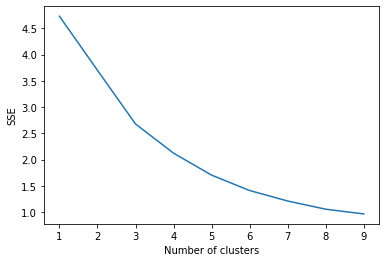

In [59]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(business_venues_grouped.drop('Capital',axis=1))
    business_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

## Perform Clustering

In [60]:
# set number of clusters
kclusters = 4

nearby_business_grouped_clustering = business_venues_grouped.drop('Capital',axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 0, 2, 0, 0, 0, 1, 2], dtype=int32)

In [62]:
#capital_business_venues_sorted.drop('Cluster Labels',axis=1,inplace=True)
capital_business_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
capital_list_=Result_df[['Capital','Latitude','Longitude','State']]
capital_list_.drop_duplicates(subset='Capital', keep='first', inplace=True)
capital_business_merged = capital_business_venues_sorted.join(capital_list_.set_index('Capital'), on='Capital')
capital_business_merged.drop_duplicates(subset='Capital', keep='first', inplace=True)
capital_business_merged.dropna(inplace=True)
capital_business_merged.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Cluster Labels,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,State
0,0,Agartala,"Ginger Agartala, Ginger Hotel Agartala",Bawarchi,Cafe Coffee Day,,,,,,,,23.831238,91.282382,Tripura
1,1,Aizawl,"Hotel Regency, Hotel Floria",Millenium Center,"The Coffee Place, Zarkawt, Aizawl",,,,,,,,23.743524,92.738291,Mizoram
2,0,Bengaluru,"Masala Klub, Ujwal Bar & Restaurant, MTR 1924,...","JW Marriott Hotel Bengaluru, Taj West End, ITC...","J W Kitchen, Yauatcha","Foodhall, Thom's Bakery and Stores","Matteo, cafe cerrise","Toscano, Sunny's","UB City, Westside","Airlines Hotel, Brahmins Coffee Bar","Millers 46, The Only Place","Café Noir, Desserted",12.979120,77.591300,Karnataka
3,0,Bhopal,"Manohar Dairy & Restaurant, Wind n Waves, Indi...","Jehan Numa Palace Hotel Bhopal, Courtyard Bhopal","Bake n shake, Eclair-The Bake Shop","D.B City Mall, HyperCITY","Cafe Coffee Day, Cafe Coffee Day","Top N Town Main Icecream Joint, D.B. City Food...","Pizza Hut, Domino's Pizza",Milan Restaurant,"Chauk Bajar, MP Nagar Zone 2","Manohar Dairy & Restaurant, KFC",23.258486,77.401989,Madhya Pradesh
4,2,Bhubaneswar,"Hotel Swosti, HHI, The Presidency, Swosti Prem...","CCD Ram Mandir Square, Cafe Coffee Day, Silver...","Pantaloons, Brand Factory, All That Jazz, Reli...","GREEN CHILLYZ, Appetite, Food Day","Dalma Odiya Restaurant (M.S. Nagar), Hotel Ven...","Tangerine 9, Shiraz Restaurant, Food Junction","Forum Mart, Bhawani Mall, Big Bazaar","Domino's Pizza, Pizza Hut, Domino's Pizza","Mamma Mia, Monginis Cake Shop",Cafe Coffee Day,20.266777,85.843559,Odisha


In [69]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon,state, poi, cluster in zip(capital_business_merged['Latitude'], capital_business_merged['Longitude'],capital_business_merged['State'],capital_business_merged['Capital'], capital_business_merged['Cluster Labels']):
    label = folium.Popup(str(state)+' '+str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [117]:
capital_business_merged.loc[capital_business_merged['Cluster Labels'] == 0, capital_business_merged.columns[[0] + list(range(1, capital_business_merged.shape[1]))]]

,Cluster Labels,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,0,Agartala,"Ginger Agartala, Ginger Hotel Agartala",Bawarchi,Cafe Coffee Day,,,,,,,,23.831238,91.282382
2,0,Bengaluru,"Masala Klub, Ujwal Bar & Restaurant, MTR 1924,...","JW Marriott Hotel Bengaluru, Taj West End, ITC...","J W Kitchen, Yauatcha","Foodhall, Thom's Bakery and Stores","Matteo, cafe cerrise","Toscano, Sunny's","UB City, Westside","Airlines Hotel, Brahmins Coffee Bar","Millers 46, The Only Place","Café Noir, Desserted",12.979120,77.591300
3,0,Bhopal,"Manohar Dairy & Restaurant, Wind n Waves, Indi...","Jehan Numa Palace Hotel Bhopal, Courtyard Bhopal","Bake n shake, Eclair-The Bake Shop","D.B City Mall, HyperCITY","Cafe Coffee Day, Cafe Coffee Day","Top N Town Main Icecream Joint, D.B. City Food...","Pizza Hut, Domino's Pizza",Milan Restaurant,"Chauk Bajar, MP Nagar Zone 2","Manohar Dairy & Restaurant, KFC",23.258486,77.401989
5,0,Chandigarh,"Cafe Nomad, Garlic and Greens, Rustic Door, Ba...","Nik Bakers, Nik Bakers, Monica's Puddings & Pi...","Ghazal, Pal Dhaba (Since 1960), The Willow Caf...","JW Marriott Hotel Chandigarh, Hotel Shivalik V...","The Coffee Bean & Tea Leaf, Indian Coffee Hous...","Backpackers Cafe, Subway, Backpackers Cafe, Su...","Ovenfresh, Brooklyn Central, Ovenfresh, Brookl...","Zara, Zara, Zara","Sector 17, Sector 17, Sector 17","Nando's, Nando's, Nando's",30.733442,76.779714
6,0,Chennai,"Shree Mithai, Nair Mess, Kakada Ramprasad, Bis...","Hotel Welcome, Taj Club House, E Hotel India, ...","Titanic Fast Food, McDonald's, KFC, KFC","Sandwich Shop, French Loaf, Subway, Subway","Amethyst, The Brew Room, Crisp Cafe, Café Coff...","Starbucks, Coffeetales, cafe coffee day","Tuscana Pizzeria, Little Italy Ristorante, Fu ...","Bombay Lassi, Mövenpick","Hotel Saravana Bhavan, Hotel Saravana Bhavan","Fruit Shop On Greams Road, Fruit Shop On Gream...",13.083694,80.270186
7,0,Daman,"Gold Beach Resort, Hotel Jazira, Hotel Ocean Inn","Veera Da Dhaba, Hotel sea rock inn","Veera Da Dhaba, Hotel sea rock inn",HDFC Bank,Domino's Pizza,Daman Gate,Nana's restaurant & bar,,,,20.420005,72.863763
10,0,Gandhinagar,"Hotel Pathikashram, Saffron, Herbs & Spice, Ho...","Pooja Parlour, Pathikashram","Sam's Pizza, Domino's Pizza","Subway, Qwiches","cafe coffee day, Ken's Koffee Plus Plus",Neopolitan Pizza,sada pind,Lakshmi bakery,Fortune Haveli Inn,Cafe coffee day,23.223288,72.649227
11,0,Gangtok,"Cafe Live & Loud, Baker's Cafe, Café Coffee Day","Nettle & Fern Hotel, Hotel Denzong Regency",Taste Of Tibet,Sikkim Mart,Lal Market,Subway,Club Mahindra Gangtok,The Coffee Shop,,,27.329046,88.612267
12,0,Hyderabad,"Prince Hotel, Cafe Bahar, Santosh Dhaba, DineH...","Taj Mahal Hotel, Mercure Hyderabad KCP, ITC Ka...","Cafe Niloufer & Bakers, The Lounge (CCD), SkyP...","Subhan Bakery, Taiba Bakers & Confectioners, K...","Mayur Pan Shop, Siraj's International Juice Ce...","Hard Rock Cafe Hyderabad, Hard Rock Cafe Hyder...","Spice 6, kAficKo, Spice 6, kAficKo","Meridian Resturant, Dadu's Purani Dilli, Merid...","GVK One, Spencers, GVK One, Spencers","Hotel Shah Ghouse, Gokul Chat, Hotel Shah Ghou...",17.388786,78.461065
14,0,Itanagar,YES Bank ATM,,,,,,,,,,27.097966,93.623729


In [118]:
capital_business_merged.loc[capital_business_merged['Cluster Labels'] == 1, capital_business_merged.columns[[0] + list(range(1, capital_business_merged.shape[1]))]]

,Cluster Labels,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
1,1,Aizawl,"Hotel Regency, Hotel Floria",Millenium Center,"The Coffee Place, Zarkawt, Aizawl",,,,,,,,23.743524,92.738291
8,1,Dehradun,"Barista, Barista Lavazza, Cafe coffee day, Caf...","The Buffet, KFC, McDonald's, Standard Bakers","Pizza Hut, Domino's Pizza, Domino's Pizza","Paltan Bazaar, Rajpur Road","Anandam, Black Pepper",Kumar Sweets,Ellora Bakers And Confectioners,hotel aketa,Subway,cafe coffee day,30.325565,78.043681
24,1,Patna,"Domino's Pizza, Domino's Pizza, Domino's Pizza","Cafe Coffee Day, Cafe Coffee Day, Cafe Coffee Day","Hotel Chanakya Patna, Maurya Hotel","KFC, KFC","17 Degrees, Pind Baluchi",P&M Mall,Boring Canal Road Crossing,The Fruit Market,pantaloons,Subway,25.609324,85.123525
27,1,Raipur,"Indian Coffee House, cafe coffee day, Indian C...","City Center Mall, Colors Mall, RK Mall","KFC, Indian chilly, Grill Inn",Veggiies,Pizza Hut,e tech consultant,Icy Spicy,"Rajdhani Thali - RK Mall, Raipur",Little Italy,,21.237947,81.633683
28,1,Ranchi,"JD Hi Street Mall, GEL Church Complex, Roshpa ...","Domino's Pizza, Domino's Pizza","Kaveri, The Great Kabab Factory,Radisson Blu",Cafe Coffee Day,KFC,Radisson Blu Hotel Ranchi,,,,,23.370035,85.325013
29,1,Shillong,"Café Shillong, swish cafe",Domino's Pizza,Police Bazaar,City Hut Family Dhaba,Hotel Centre Point,Bread cafe,Subway,,,,25.576045,91.882528
31,1,Srinagar,"14th Avenue Café, CCD, Cafe Robusta lounge, Ca...","Dalgate, floating market","The Lalit Grand Palace Hotel, Houseboat, Nagin...","Town Square Mall, Land Mark Karan Nagar",Amigos,BANGS,Mughal Darbar,Shamyana Restaurant,Coffea Arabica,Shamyana Restaurant,34.074744,74.820444


In [119]:
capital_business_merged.loc[capital_business_merged['Cluster Labels'] == 2, capital_business_merged.columns[[0] + list(range(1, capital_business_merged.shape[1]))]]

,Cluster Labels,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
4,2,Bhubaneswar,"Hotel Swosti, HHI, The Presidency, Swosti Prem...","CCD Ram Mandir Square, Cafe Coffee Day, Silver...","Pantaloons, Brand Factory, All That Jazz, Reli...","GREEN CHILLYZ, Appetite, Food Day","Dalma Odiya Restaurant (M.S. Nagar), Hotel Ven...","Tangerine 9, Shiraz Restaurant, Food Junction","Forum Mart, Bhawani Mall, Big Bazaar","Domino's Pizza, Pizza Hut, Domino's Pizza","Mamma Mia, Monginis Cake Shop",Cafe Coffee Day,20.266777,85.843559
9,2,Dispur,"Big Bazaar Family Center, Sohum Emporia, Panta...","Grill Republica, KFC, KFC, KFC, FoodExx","Cafe Coffee Day, Brewberry's, Cafe Coffee Day,...","Pizza Hut, Domino's Pizza, Domino's Pizza, Dom...","Naga Kitchen, Khorikha","Dona Planet, HUB","Mocha, Patisserie Opera","The Yellow Chilli, Paradise Parampara",Shanghai Salsa,Makhan Bhog,26.151308,91.793380
25,2,Pondicherry,"Mauriya Restaurant, Pannai Veedu",Karaikal Sunday Market,"Mauriya Restaurant, Pannai Veedu",Saudha Marche,,,,,,,10.915649,79.806949
26,2,Port Blair,Icy Spicy,Veer Savarkar International Airport (IXZ),Aberdeen Bazar,Ananda Restaurant,PCD Jetty,,,,,,11.664535,92.739045


In [125]:
capital_business_merged.loc[capital_business_merged['Cluster Labels'] == 3, capital_business_merged.columns[[0] + list(range(1, capital_business_merged.shape[1]))]]

,Cluster Labels,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,State
13,3,Imphal,Manikumar Jewellary,Heartstrings,,,,,,,,,24.800609,93.937000,Manipur
17,3,Kavaratti,kavaratti,,,,,,,,,,10.559050,72.636569,Lakshadweep
